# 19. 훈련 과정 시각화하기

신경망 모델의 훈련에 사용되는 fit()메서드는 History 객체를 반환합니다.

History.history 속성은 훈련 과정에서 에포크 (epoch)에 따른 정확도 (accuracy) 와 같은 지표와 손실값을 기록합니다.

또한 검증 (validation)의 지표와 손실값도 기록합니다.

아래의 코드는 10회의 훈련과정에서 기록된 훈련 정확도 & 손실값 그리고 검증 정확도 & 손실값을 시각화합니다.

# 예제

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2296 - accuracy: 0.9323 - val_loss: 0.1310 - val_accuracy: 0.9603
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0909 - accuracy: 0.9725 - val_loss: 0.1023 - val_accuracy: 0.9690
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.1004 - val_accuracy: 0.9706
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0969 - val_accuracy: 0.9729
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0880 - val_accuracy: 0.9755
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0957 - val_accuracy: 0.9736
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0924 - val_accuracy:

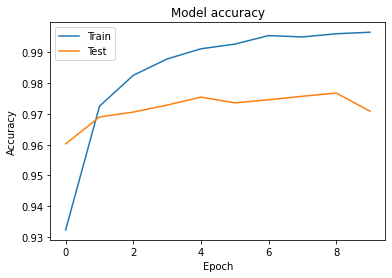

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


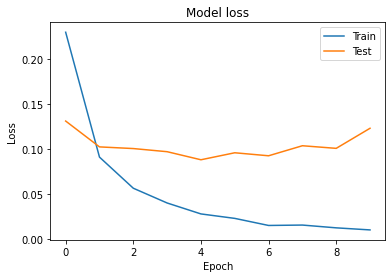

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 훈련
history = model.fit(x_train, y_train, validation_split=0.25, epochs = 10, verbose=1)
print(history.history)

# 6. 훈련 과정 시각화(정확도)
#plt.plot(history.history['accuracy'], label='Train')
#plt.plot(history.history['val_accuracy'], label='Test')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.legend(loc='upper left')
plt.legend(['Train','Test'], loc='upper left') # plt.legend() 메서드 안에다가 범례를 지정해줘도됨
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc='upper')
plt.show()

model.fit()에 훈련 데이터를 입력해줍니다.

validation_split는 0에서 1사이의 값입니다. 0.25로 설정해주면 훈련 데이터의 25%를 검증에 사용합니다.

따라서 아래와 같이 60,000개의 데이터 중 45000개를 훈련에 사용하고 15,000개를 검증에 사용합니다.

'accuracy','val_accuracy','loss','val_loss'와 같은 키 값을 이용해서 훈련 과정의 에포크에 따른 정확도, 손실값을 얻을 수 있습니다.